# Power Outages
* **See the main project notebook for instructions to be sure you satisfy the rubric!**
* See Project 03 for information on the dataset.
* A few example prediction questions to pursue are listed below. However, don't limit yourself to them!
    * Predict the severity (number of customers, duration, or demand loss) of a major power outage.
    * Predict the cause of a major power outage.
    * Predict the number and/or severity of major power outages in the year 2020.
    * Predict the electricity consumption of an area.

Be careful to justify what information you would know at the "time of prediction" and train your model using only those features.

# Summary of Findings

### Introduction

Prediction problem chosen is to predict the severity of a major power outage using Regression. 
- Target used: OUTAGE.DURATION 
- Evaluation metric used is RMSE since we want to see if our prediction model improves if more features or enginnered features are added. I thought of using R-squared at the beginning but realised that it only increases as predictors are added to the regression model. 


### Baseline Model

For the baseline model I wanted to see if the outage duration could be predicted just by using 
GENERAL INFORMATIO such as geographic data, climate region information and the cause, without taking into consideration the REGIONAL ELECTRICITY CONSUMPTION INFORMATION, ECONOMIC CHARACTERISTICS or LAND-USE CHARACTERICS.
6 Features (all Nominal): 
- MONTH
- POSTAL.CODE
- NERC.REGION
- CLIMATE.REGION
- ANOMALY.LEVEL
- CAUSE.CATEGORY

I was not expecting good results for this model and it was confirmed once I anlysed it. 
Out of 100 analyses comparing 50 different train and test sets, the distribution shows that only between 0 and 35% of the test_rmse where lower than the train_rmse. The r-squared scores for one example are not great either. 

### Final Model

For the engineered features I just changed the all the prices from cents/kilowwat-hour to cents/megawatt-hour to match the values for the energy comsumption. I also changed percentages to proportions. <br>
I wanted to generate more complex features like combining 2 features but a this dataset already came with lots of combined features and I couldn't find a suitable one. 

Didn't get to finish, I was left trying to select the features that would improve my baseline model.

### Fairness Evaluation
TODO

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [2]:
# Read in the excel file and format it 
outages = pd.read_excel('data/outage.xlsx', header=5, usecols='c:BE').drop(0, axis=0).reset_index(drop=True)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
outages.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,OUTAGE.RESTORATION.DATE,OUTAGE.RESTORATION.TIME,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,RES.PRICE,COM.PRICE,IND.PRICE,TOTAL.PRICE,RES.SALES,COM.SALES,IND.SALES,TOTAL.SALES,RES.PERCEN,COM.PERCEN,IND.PERCEN,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS,TOTAL.CUSTOMERS,RES.CUST.PCT,COM.CUST.PCT,IND.CUST.PCT,PC.REALGSP.STATE,PC.REALGSP.USA,PC.REALGSP.REL,PC.REALGSP.CHANGE,UTIL.REALGSP,TOTAL.REALGSP,UTIL.CONTRI,PI.UTIL.OFUSA,POPULATION,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,2011.0,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,2011-07-01 00:00:00,17:00:00,2011-07-03 00:00:00,20:00:00,severe weather,NaN,NaN,3060,NaN,70000.0,11.6,9.18,6.81,9.28,2332915,2114774,2113291,6562520,35.5491,32.225,32.2024,2308736.0,276286.0,10673.0,2595696.0,88.9448,10.644,0.411181,51268,47586,1.07738,1.6,4802,274182,1.75139,2.2,5348119.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
1,2014.0,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2014-05-11 00:00:00,18:38:00,2014-05-11 00:00:00,18:39:00,intentional attack,vandalism,NaN,1,NaN,NaN,12.12,9.71,6.49,9.28,1586986,1807756,1887927,5284231,30.0325,34.2104,35.7276,2345860.0,284978.0,9898.0,2640737.0,88.8335,10.7916,0.37482,53499,49091,1.08979,1.9,5226,291955,1.79,2.2,5457125.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
2,2010.0,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,2010-10-26 00:00:00,20:00:00,2010-10-28 00:00:00,22:00:00,severe weather,heavy wind,NaN,3000,NaN,70000.0,10.87,8.19,6.07,8.15,1467293,1801683,1951295,5222116,28.0977,34.501,37.366,2300291.0,276463.0,10150.0,2586905.0,88.9206,10.687,0.392361,50447,47287,1.06683,2.7,4571,267895,1.70627,2.1,5310903.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
3,2012.0,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2012-06-19 00:00:00,04:30:00,2012-06-20 00:00:00,23:00:00,severe weather,thunderstorm,NaN,2550,NaN,68200.0,11.79,9.25,6.71,9.19,1851519,1941174,1993026,5787064,31.9941,33.5433,34.4393,2317336.0,278466.0,11010.0,2606813.0,88.8954,10.6822,0.422355,51598,48156,1.07148,0.6,5364,277627,1.93209,2.2,5380443.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
4,2015.0,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,2015-07-18 00:00:00,02:00:00,2015-07-19 00:00:00,07:00:00,severe weather,NaN,NaN,1740,250,250000.0,13.07,10.16,7.74,10.43,2028875,2161612,1777937,5970339,33.9826,36.2059,29.7795,2374674.0,289044.0,9812.0,2673531.0,88.8216,10.8113,0.367005,54431,49844,1.09203,1.7,4873,292023,1.6687,2.2,5489594.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874


In [5]:
def RMSE(predictions, actual):
    return np.sqrt(np.mean((predictions - actual)**2))

### Baseline Model

In [6]:
# getting the columns for baseline model 
base = outages[['MONTH', 'POSTAL.CODE', 'NERC.REGION', 'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CAUSE.CATEGORY', 'OUTAGE.DURATION']]
base

,MONTH,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CAUSE.CATEGORY,OUTAGE.DURATION
0,7.0,MN,MRO,East North Central,-0.3,severe weather,3060
1,5.0,MN,MRO,East North Central,-0.1,intentional attack,1
2,10.0,MN,MRO,East North Central,-1.5,severe weather,3000
3,6.0,MN,MRO,East North Central,-0.1,severe weather,2550
4,7.0,MN,MRO,East North Central,1.2,severe weather,1740
...,...,...,...,...,...,...,...
1529,12.0,ND,MRO,West North Central,-0.9,public appeal,720
1530,NaN,ND,MRO,West North Central,NaN,fuel supply emergency,NaN
1531,8.0,SD,RFC,West North Central,0.5,islanding,59
1532,8.0,SD,MRO,West North Central,0.5,islanding,181


In [7]:
# checking for null values 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 7 columns):
MONTH              1525 non-null float64
POSTAL.CODE        1534 non-null object
NERC.REGION        1534 non-null object
CLIMATE.REGION     1528 non-null object
ANOMALY.LEVEL      1525 non-null object
CAUSE.CATEGORY     1534 non-null object
OUTAGE.DURATION    1476 non-null object
dtypes: float64(1), object(6)
memory usage: 84.0+ KB


In [8]:
# remove rows where OUTAGE.DURATION is null since there are only 58 rows out of 1534
base = base.dropna(subset=['OUTAGE.DURATION'])
# fill the null climate regions with Outside (continental U.S.A)
base['CLIMATE.REGION'] = base[['CLIMATE.REGION']].fillna('Outside')

/Users/erlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476 entries, 0 to 1532
Data columns (total 7 columns):
MONTH              1476 non-null float64
POSTAL.CODE        1476 non-null object
NERC.REGION        1476 non-null object
CLIMATE.REGION     1476 non-null object
ANOMALY.LEVEL      1476 non-null object
CAUSE.CATEGORY     1476 non-null object
OUTAGE.DURATION    1476 non-null object
dtypes: float64(1), object(6)
memory usage: 92.2+ KB


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
# pipeline to onehot encode columns and perform linear regression
pl = Pipeline([
        ('one-hot', OneHotEncoder(handle_unknown = 'ignore')),
        ('lin-reg', LinearRegression())
    ])

In [12]:
# get X and y 
X = base.drop('OUTAGE.DURATION', 1)
y = base['OUTAGE.DURATION']

In [13]:
# split data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [14]:
# fit the model and compare scores 
pl.fit(X_train, y_train)
pl.score(X_train, y_train), pl.score(X_test, y_test)

(0.3415442428663398, 0.07017470375519275)

In [15]:
train_rmse = RMSE(pl.predict(X_train), y_train)
test_rmse = RMSE(pl.predict(X_test), y_test)
train_rmse, test_rmse

(4149.407572415524, 7636.054301367026)

In [16]:
# getting couple more scores for comparison 
x = []

for i in range(100):
    result = {
        'train_rmse':[],
        'test_rmse':[]
    }

    for _ in range(50):
        X_train, X_test, y_train, y_test = train_test_split(X, y) 
        pl.fit(X_train, y_train)

        train_rmse = RMSE(pl.predict(X_train), y_train)
        test_rmse = RMSE(pl.predict(X_test), y_test)

        result['train_rmse'].append(train_rmse)
        result['test_rmse'].append(test_rmse)

        percent = (np.array(result['test_rmse']) < np.array(result['train_rmse'])).sum() / 100

        x.append(percent)

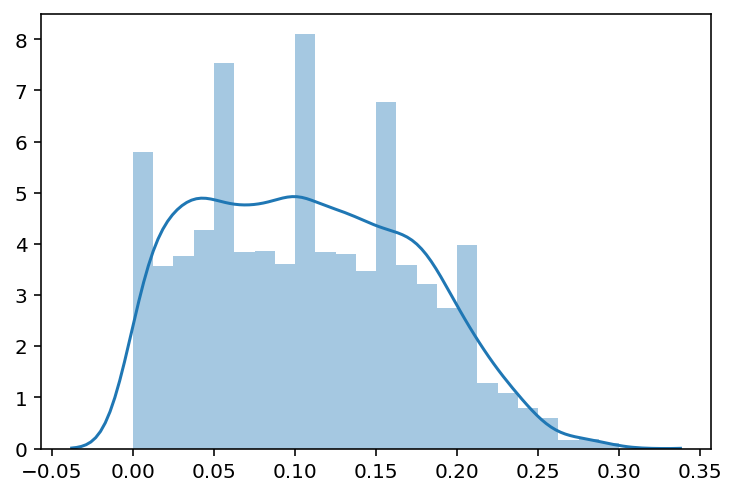

In [17]:
sns.distplot(x)

### Final Model

In [163]:
cols = outages.columns[:45]

In [164]:
drop = list(cols[36:44]) + [cols[2]] + list(cols[7:12]) + list(cols[13:15]) + list(cols[16:18])

In [206]:
final = outages[cols].drop(drop, 1)
final

,YEAR,MONTH,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CAUSE.CATEGORY,OUTAGE.DURATION,RES.PRICE,COM.PRICE,IND.PRICE,TOTAL.PRICE,RES.SALES,COM.SALES,IND.SALES,TOTAL.SALES,RES.PERCEN,COM.PERCEN,IND.PERCEN,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS,TOTAL.CUSTOMERS,RES.CUST.PCT,COM.CUST.PCT,IND.CUST.PCT,POPULATION
0,2011.0,7.0,MN,MRO,East North Central,-0.3,severe weather,3060,11.6,9.18,6.81,9.28,2332915,2114774,2113291,6562520,35.5491,32.225,32.2024,2308736.0,276286.0,10673.0,2595696.0,88.9448,10.644,0.411181,5348119.0
1,2014.0,5.0,MN,MRO,East North Central,-0.1,intentional attack,1,12.12,9.71,6.49,9.28,1586986,1807756,1887927,5284231,30.0325,34.2104,35.7276,2345860.0,284978.0,9898.0,2640737.0,88.8335,10.7916,0.37482,5457125.0
2,2010.0,10.0,MN,MRO,East North Central,-1.5,severe weather,3000,10.87,8.19,6.07,8.15,1467293,1801683,1951295,5222116,28.0977,34.501,37.366,2300291.0,276463.0,10150.0,2586905.0,88.9206,10.687,0.392361,5310903.0
3,2012.0,6.0,MN,MRO,East North Central,-0.1,severe weather,2550,11.79,9.25,6.71,9.19,1851519,1941174,1993026,5787064,31.9941,33.5433,34.4393,2317336.0,278466.0,11010.0,2606813.0,88.8954,10.6822,0.422355,5380443.0
4,2015.0,7.0,MN,MRO,East North Central,1.2,severe weather,1740,13.07,10.16,7.74,10.43,2028875,2161612,1777937,5970339,33.9826,36.2059,29.7795,2374674.0,289044.0,9812.0,2673531.0,88.8216,10.8113,0.367005,5489594.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,2011.0,12.0,ND,MRO,West North Central,-0.9,public appeal,720,8.41,7.8,6.2,7.56,488853,438133,386693,1313678,37.2125,33.3516,29.4359,330738.0,60017.0,3639.0,394394.0,83.8598,15.2175,0.922681,685326.0
1530,2006.0,NaN,ND,MRO,West North Central,NaN,fuel supply emergency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309997.0,53709.0,2331.0,366037.0,84.6901,14.6731,0.636821,649422.0
1531,2009.0,8.0,SD,RFC,West North Central,0.5,islanding,59,9.25,7.47,5.53,7.67,337874,370771,215406,924051,36.5644,40.1245,23.3111,367206.0,65971.0,3052.0,436229.0,84.1773,15.123,0.699633,807067.0
1532,2009.0,8.0,SD,MRO,West North Central,0.5,islanding,181,9.25,7.47,5.53,7.67,337874,370771,215406,924051,36.5644,40.1245,23.3111,367206.0,65971.0,3052.0,436229.0,84.1773,15.123,0.699633,807067.0


In [207]:
# drop rows 
final = final.dropna(subset=['OUTAGE.DURATION', 'RES.PRICE'])
# fill the null climate regions with Outside (continental U.S.A)
final['CLIMATE.REGION'] = final[['CLIMATE.REGION']].fillna('Outside')

/Users/erlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [208]:
# make sure no null values 
final.isnull().sum().all() == 0

True

In [209]:
# getting column names where the numerical values are type object
columns = ['ANOMALY.LEVEL'] + list(final.columns[7:])

In [210]:
# changing the type of the previously fetched columns to float type values 
for col in columns:
    final[col] =  final[col].astype(float)

/Users/erlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Engineered Features

In [211]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1532
Data columns (total 27 columns):
YEAR               1464 non-null float64
MONTH              1464 non-null float64
POSTAL.CODE        1464 non-null object
NERC.REGION        1464 non-null object
CLIMATE.REGION     1464 non-null object
ANOMALY.LEVEL      1464 non-null float64
CAUSE.CATEGORY     1464 non-null object
OUTAGE.DURATION    1464 non-null float64
RES.PRICE          1464 non-null float64
COM.PRICE          1464 non-null float64
IND.PRICE          1464 non-null float64
TOTAL.PRICE        1464 non-null float64
RES.SALES          1464 non-null float64
COM.SALES          1464 non-null float64
IND.SALES          1464 non-null float64
TOTAL.SALES        1464 non-null float64
RES.PERCEN         1464 non-null float64
COM.PERCEN         1464 non-null float64
IND.PERCEN         1464 non-null float64
RES.CUSTOMERS      1464 non-null float64
COM.CUSTOMERS      1464 non-null float64
IND.CUSTOMERS      1464 non-null flo

In [212]:
# changed electricity prices to cents per megawatt per hour to match electricity consumption data
prices = [x for x in final.columns if 'PRICE' in x]
for price in prices:
    final[price] = final[price]*1000

/Users/erlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [213]:
# change percentages to proportions 
percentages = [x for x in final.columns if ('PERCEN' in x ) or ('PCT' in x)]
for percent in percentages:
    final[percent] = final[percent]/100

/Users/erlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [214]:
# one hot encoder  
one_hot = ['MONTH', 'POSTAL.CODE', 'NERC.REGION', 'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CAUSE.CATEGORY']
one_hot_encoder = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore'))
])

In [215]:
preproc = ColumnTransformer(transformers=[('one-hot', one_hot_encoder, one_hot)], remainder='passthrough')

In [216]:
final.head()

,YEAR,MONTH,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CAUSE.CATEGORY,OUTAGE.DURATION,RES.PRICE,COM.PRICE,IND.PRICE,TOTAL.PRICE,RES.SALES,COM.SALES,IND.SALES,TOTAL.SALES,RES.PERCEN,COM.PERCEN,IND.PERCEN,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS,TOTAL.CUSTOMERS,RES.CUST.PCT,COM.CUST.PCT,IND.CUST.PCT,POPULATION
0,2011.0,7.0,MN,MRO,East North Central,-0.3,severe weather,3060.0,11600.0,9180.0,6810.0,9280.0,2332915.0,2114774.0,2113291.0,6562520.0,0.355491,0.322250,0.322024,2308736.0,276286.0,10673.0,2595696.0,0.889448,0.106440,0.004112,5348119.0
1,2014.0,5.0,MN,MRO,East North Central,-0.1,intentional attack,1.0,12120.0,9710.0,6490.0,9280.0,1586986.0,1807756.0,1887927.0,5284231.0,0.300325,0.342104,0.357276,2345860.0,284978.0,9898.0,2640737.0,0.888335,0.107916,0.003748,5457125.0
2,2010.0,10.0,MN,MRO,East North Central,-1.5,severe weather,3000.0,10870.0,8190.0,6070.0,8150.0,1467293.0,1801683.0,1951295.0,5222116.0,0.280977,0.345010,0.373660,2300291.0,276463.0,10150.0,2586905.0,0.889206,0.106870,0.003924,5310903.0
3,2012.0,6.0,MN,MRO,East North Central,-0.1,severe weather,2550.0,11790.0,9250.0,6710.0,9190.0,1851519.0,1941174.0,1993026.0,5787064.0,0.319941,0.335433,0.344393,2317336.0,278466.0,11010.0,2606813.0,0.888954,0.106822,0.004224,5380443.0
4,2015.0,7.0,MN,MRO,East North Central,1.2,severe weather,1740.0,13070.0,10160.0,7740.0,10430.0,2028875.0,2161612.0,1777937.0,5970339.0,0.339826,0.362059,0.297795,2374674.0,289044.0,9812.0,2673531.0,0.888216,0.108113,0.003670,5489594.0


In [188]:
sales = [x for x in final.columns if 'SALES' in x]
customers = [x for x in final.columns if 'CUSTOMERS' in x]

In [140]:
final = final.drop(prices, 1)

In [141]:
final = final.drop(sales, 1)

In [142]:
final = final.drop(customers, 1)

In [253]:
final2 = final[list(base.columns) + [x for x in final.columns if 'PERCEN' in x]]

In [254]:
# get X and y for final model
X = final2.drop('OUTAGE.DURATION', 1)
y = final2['OUTAGE.DURATION']

In [255]:
pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', LinearRegression())])

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [262]:
X_train

,MONTH,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CAUSE.CATEGORY,RES.PERCEN,COM.PERCEN,IND.PERCEN
993,8.0,LA,SERC,South,-1.2,public appeal,0.434492,0.283057,0.282334
611,9.0,PA,RFC,Northeast,-0.3,severe weather,0.325326,0.329423,0.339647
24,1.0,TN,SERC,Central,-0.5,severe weather,0.502139,0.297561,0.200283
964,5.0,NY,NPCC,Northeast,0.6,fuel supply emergency,0.310822,0.537362,0.131855
1409,12.0,OK,SPP,South,2.3,severe weather,0.381490,0.317131,0.301379
...,...,...,...,...,...,...,...,...,...
1135,3.0,CA,WECC,West,0.6,intentional attack,0.325168,0.475144,0.196177
1523,1.0,ID,WECC,Northwest,-1.3,intentional attack,0.463662,0.259424,0.276914
1337,12.0,VA,SERC,Southeast,1.1,severe weather,0.456398,0.267215,0.167384
1430,12.0,OK,SPP,South,2.3,severe weather,0.381490,0.317131,0.301379


In [263]:
pl.fit(X_train, y_train)
pl.score(X_train, y_train), pl.score(X_test, y_test)

(0.25944102771604227, 0.1675276958604276)

In [264]:
train_rmse = RMSE(pl.predict(X_train), y_train)
test_rmse = RMSE(pl.predict(X_test), y_test)
train_rmse, test_rmse

(4485.867210729153, 7101.168879547022)

In [265]:
# getting couple more scores for comparison 
x = []

for i in range(100):
    result = {
        'train_rmse':[],
        'test_rmse':[]
    }

    for _ in range(50):
        X_train, X_test, y_train, y_test = train_test_split(X, y) 
        pl.fit(X_train, y_train)

        train_rmse = RMSE(pl.predict(X_train), y_train)
        test_rmse = RMSE(pl.predict(X_test), y_test)

        result['train_rmse'].append(train_rmse)
        result['test_rmse'].append(test_rmse)

        percent = (np.array(result['test_rmse']) < np.array(result['train_rmse'])).sum() / 100

        x.append(percent)

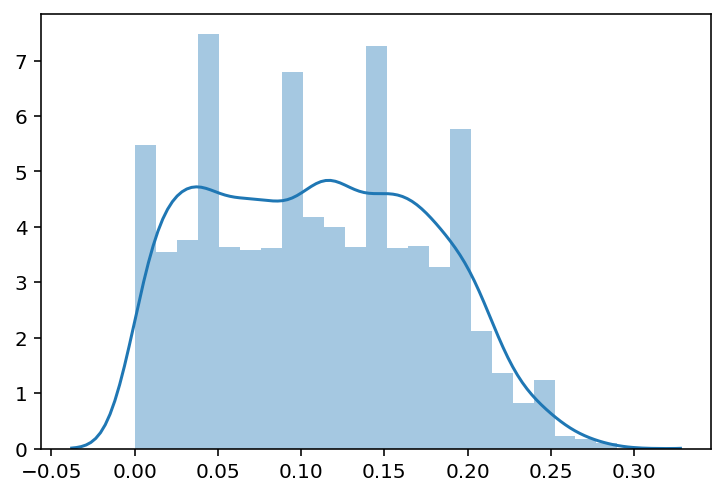

In [266]:
sns.distplot(x)

In [267]:
from sklearn.tree import DecisionTreeRegressor

In [303]:
pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', DecisionTreeRegressor(max_depth=3))])

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
pl.fit(X_train, y_train)
pl.score(X_train, y_train), pl.score(X_test, y_test)

(0.4379802488132849, 0.21117761598429385)

In [305]:
train_rmse = RMSE(pl.predict(X_train), y_train)
test_rmse = RMSE(pl.predict(X_test), y_test)
train_rmse, test_rmse

(4812.191620323374, 3785.204777208536)

In [199]:
from sklearn.model_selection import GridSearchCV

### Fairness Evaluation

In [30]:
# TODO